In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv("west_merged_all.csv", index_col='time')
df.head()

,sur_air_temp,relative_humidity,H2O_vapor_mass_ratio_surf,mean_precipitation_rate,albedo_500,cloud_temp,surf_temp,H2O_vapor_mass_ratio
time,,,,,,,,
2020-01-01,0.1625,-9999.0,3.507812,0.000,-1.267651e+30,-16.52500,-5.4000,-9999.0
2020-01-02,2.7875,-9999.0,3.652344,0.000,9.304000e-01,-2.65000,6.2875,-9999.0
2020-01-03,-9999.0000,-9999.0,-9999.000000,0.125,-1.267651e+30,-26.86875,-9999.0000,-9999.0
2020-01-04,-9999.0000,-9999.0,-9999.000000,1.105,-1.267651e+30,-16.27500,1.2250,-9999.0
2020-01-05,-1.4000,-9999.0,2.351562,0.000,-1.267651e+30,-12.90000,4.0375,-9999.0


In [11]:
#transform extreme dataset into missing/null
columns = df.columns[:]

def transform_extreme(df):
    for col in columns:
        df.loc[df[col] == -9999, col] = None
    return df

df = transform_extreme(df)
df.isnull().sum()


sur_air_temp                  826
relative_humidity            1231
H2O_vapor_mass_ratio_surf     869
mean_precipitation_rate         0
albedo_500                      2
cloud_temp                    214
surf_temp                     473
H2O_vapor_mass_ratio         1231
dtype: int64

In [12]:
#remove entire columns with missing values greater than 1200
missing_counts = df.isnull().sum()
df = df.loc[:, missing_counts <= 1200]
df.head()

,sur_air_temp,H2O_vapor_mass_ratio_surf,mean_precipitation_rate,albedo_500,cloud_temp,surf_temp
time,,,,,,
2020-01-01,0.1625,3.507812,0.000,-1.267651e+30,-16.52500,-5.4000
2020-01-02,2.7875,3.652344,0.000,9.304000e-01,-2.65000,6.2875
2020-01-03,NaN,NaN,0.125,-1.267651e+30,-26.86875,NaN
2020-01-04,NaN,NaN,1.105,-1.267651e+30,-16.27500,1.2250
2020-01-05,-1.4000,2.351562,0.000,-1.267651e+30,-12.90000,4.0375


In [13]:
#imputing missing values with forward/backward + interpopation
from sklearn.impute import SimpleImputer
import numpy as np

# Handle any non-numeric values first
df = df.apply(pd.to_numeric, errors='coerce')

# Forward fill missing values first
df = df.ffill()
# Then backward fill any remaining missing values
df = df.ffill()
# Use interpolation for any still remaining missing values
df = df.interpolate(method='linear', limit_direction='both')
# Final check - replace any remaining NaN with column means
df = df.fillna(df.mean())
# Verify no missing values remain
print(df.isnull().sum())
df.describe()

sur_air_temp                 0
H2O_vapor_mass_ratio_surf    0
mean_precipitation_rate      0
albedo_500                   0
cloud_temp                   0
surf_temp                    0
dtype: int64


,sur_air_temp,H2O_vapor_mass_ratio_surf,mean_precipitation_rate,albedo_500,cloud_temp,surf_temp
count,1891.000000,1891.000000,1891.000000,1.891000e+03,1891.000000,1891.000000
mean,11.588697,6.888645,3.192927,-9.827479e+29,-16.868320,12.510762
std,9.359885,3.879250,7.513056,5.292788e+29,15.319634,11.736518
min,-11.337500,0.816406,0.000000,-1.267651e+30,-63.306252,-19.931250
25%,3.537500,3.761719,0.000000,-1.267651e+30,-27.196875,2.537500
50%,11.912500,5.750000,0.075000,-1.267651e+30,-16.337500,12.600000
75%,19.912500,9.839844,2.415000,-1.267651e+30,-5.962500,23.287500
max,29.475000,18.390625,101.190002,9.991000e-01,24.162500,37.349998


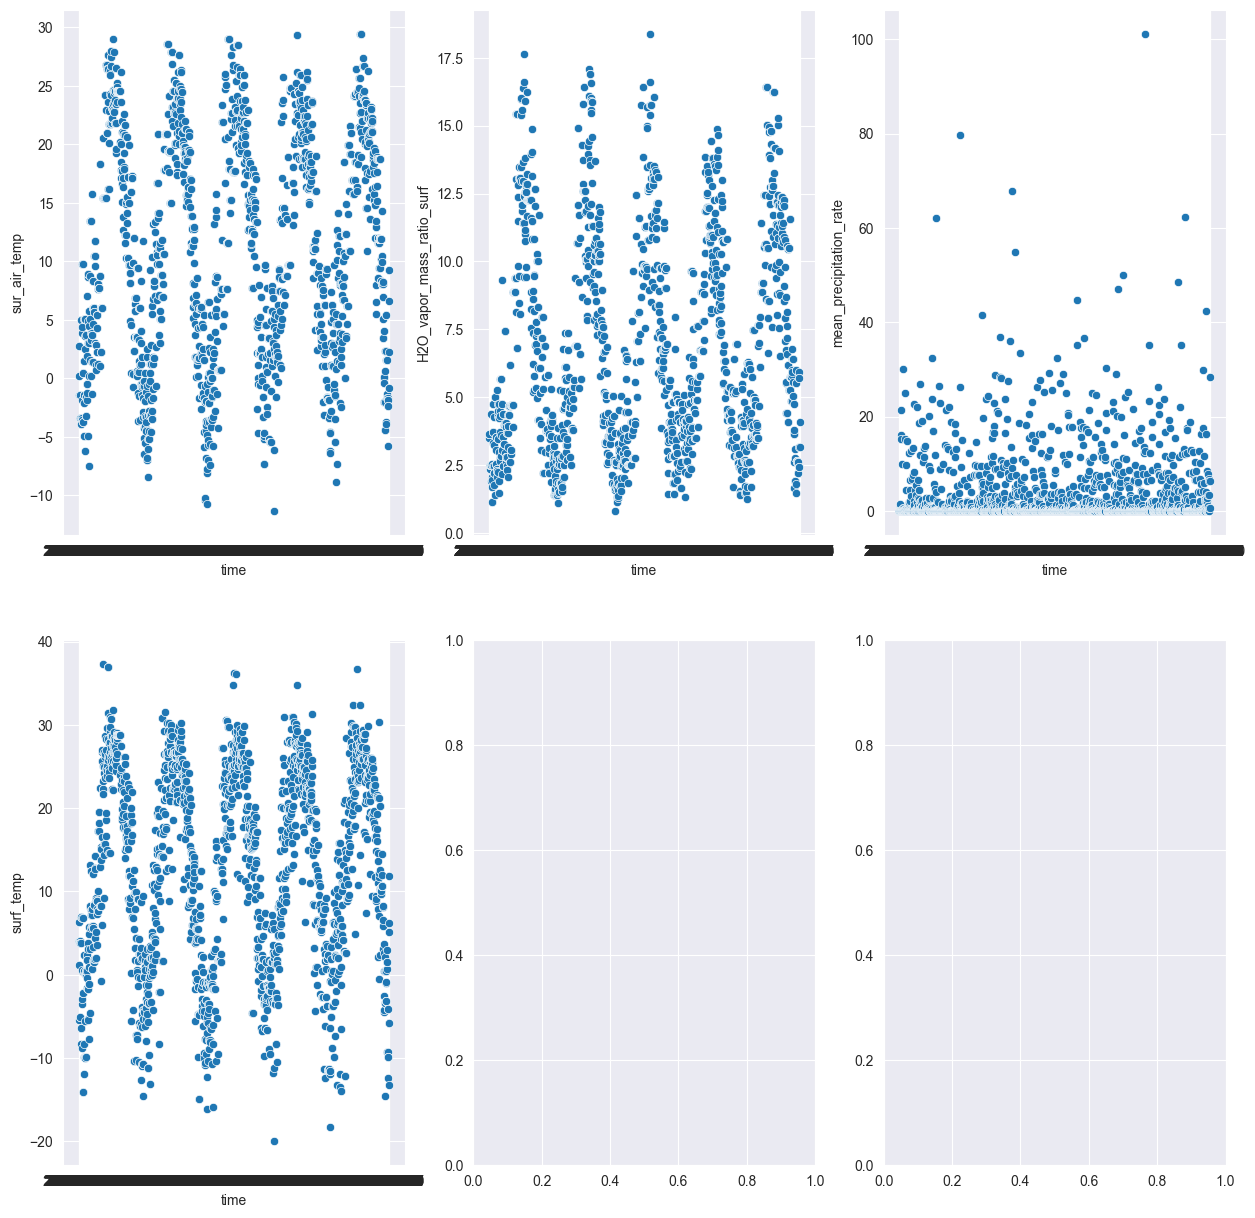

In [14]:
#visualize distribution
import matplotlib.pyplot as plt
import seaborn as sns
_, axss = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
sns.scatterplot(data=df, x="time", y="sur_air_temp", ax=axss[0, 0])
sns.scatterplot(data=df, x="time", y="H2O_vapor_mass_ratio_surf", ax=axss[0, 1])
sns.scatterplot(data=df, x="time", y="mean_precipitation_rate", ax=axss[0, 2])
sns.scatterplot(data=df, x="time", y="surf_temp", ax=axss[1, 0])

plt.show()

In [15]:
df.reset_index

<bound method DataFrame.reset_index of             sur_air_temp  H2O_vapor_mass_ratio_surf  mean_precipitation_rate  \
time                                                                           
2020-01-01        0.1625                   3.507812                 0.000000   
2020-01-02        2.7875                   3.652344                 0.000000   
2020-01-03        2.7875                   3.652344                 0.125000   
2020-01-04        2.7875                   3.652344                 1.105000   
2020-01-05       -1.4000                   2.351562                 0.000000   
...                  ...                        ...                      ...   
2024-12-28        9.2250                   5.699219                 6.360001   
2024-12-29        9.2250                   5.699219                 3.380000   
2024-12-30       -0.8375                   3.167969                 6.389999   
2024-12-31       -0.8375                   3.167969                 0.635000   
2

In [22]:
import os

base_dir = os.path.abspath(os.path.join(os.getcwd(), '../../../src/ts_west'))
os.makedirs(base_dir, exist_ok=True)
file_path = os.path.join(base_dir, 'west_ppl.csv')

df.to_csv(file_path)
print("✅ Saved to:", file_path)

✅ Saved to: /Users/fuchenyiwei/Documents/GitHub/2025-nasa-space-app-challenge/src/ts_west/west_ppl.csv
